## FER model inferance for Django app 

In [1]:
import os
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

import cv2

Using TensorFlow backend.


In [2]:
#Saving the model
model = load_model('test.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 128)       73856     
__________

In [7]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


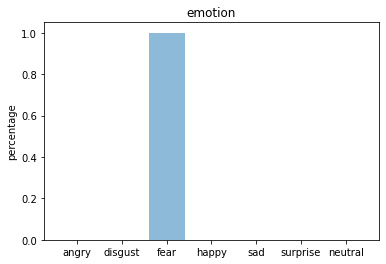

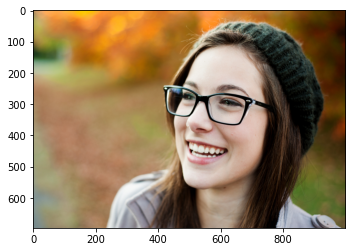

In [8]:
def plotface(file):
  true_image = image.load_img(file)
  img = image.load_img(file, grayscale=True, target_size=(48, 48))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  custom = model.predict(x)
  emotion_analysis(custom[0])

  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);

  plt.gray()
  plt.imshow(true_image)
  plt.show()

plotface(path+'/1.jpg')

In [10]:
def facecrop(image):  
    """
    Use pretrained HAAR cascade to detect the face and build a bounding box 
    """
    facedata = path+'/haarcascade_frontalface_alt.xml'
    #facedata = path+"/haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite(path+'/capture.jpg', sub_face)
            print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)
    #plt.imshow(img)



facecrop(path+'/1.jpg')

Writing: drive/My Drive/Capstone/emoJ/templates/1.jpg


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


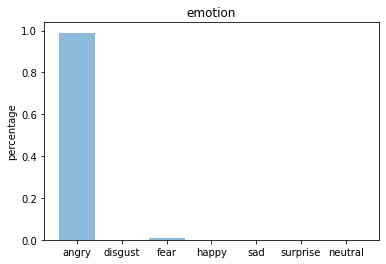

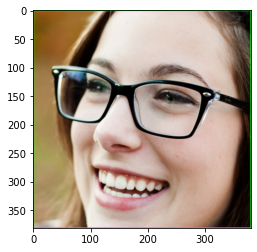

In [11]:
plotface(path+'/capture.jpg')